In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

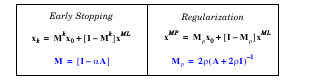

Figure.9 Early Stopping and Regularization Solutions

## Connection Between Early Stopping and Regularization

To compare early stopping and regularization, we will look at the corresponding equations: Eq. (13.43) for early stopping and Eq. (13.32) for regularization, which are summarized in Figure 13.9.

We aim to find out when early stopping and regularization produce the same weights, i.e., when the solutions from the two approaches are equal.

### Early Stopping and Regularization

- **Key matrix for early stopping:**

$$
M = \left[ I - \alpha A \right]^k
$$

- **Key matrix for regularization:**

$$
M_{\rho} = 2\rho \left( A + 2\rho I \right)^{-1}
$$

### Eigenvalues and Eigenvectors

From Eq. (9.22), we know that the eigenvectors of $ M $ are the same as those of $ A $, and the eigenvalues of $ M $ are given by:

$$
\text{eig}(M) = (1 - \alpha \lambda_i)^k \quad \text{where} \quad \lambda_i \text{ are the eigenvalues of } A.
$$

For the matrix $ M_{\rho} $, using the same procedure, we know that the eigenvectors of $ A + 2\rho I $ are the same as those of $ A $, and the eigenvalues of $ A + 2\rho I $ are:

$$
\lambda_i + 2\rho.
$$

Since the eigenvectors of the inverse of a matrix are the same as those of the original matrix, and the eigenvalues of the inverse are the reciprocals of the original eigenvalues, the eigenvalues of $ M_{\rho} $ are:

$$
\text{eig}(M_{\rho}) = \frac{2\rho}{\lambda_i + 2\rho}.
$$

### Setting Eigenvalues Equal

To make the two solutions equal, the eigenvalues of $ M $ and $ M_{\rho} $ must be equal:

$$
(1 - \alpha \lambda_i)^k = \frac{2\rho}{\lambda_i + 2\rho}.
$$

Taking the logarithm of both sides:

$$
\log\left(1 + \frac{\lambda_i}{2\rho}\right) = k \log(1 - \alpha \lambda_i).
$$

These expressions are equal when $ \lambda_i = 0 $. To ensure equality, we can set their derivatives equal.

### Derivatives

Taking the derivative of both sides:

$$
\frac{1}{1 + \frac{\lambda_i}{2\rho}} \cdot \frac{1}{2\rho} = \frac{k \alpha}{1 - \alpha \lambda_i}.
$$

Simplifying:

$$
\alpha k = \frac{1}{2\rho} \cdot \frac{1 - \alpha \lambda_i}{1 + \frac{\lambda_i}{2\rho}}.
$$

For small $ \alpha \lambda_i $ (slow and stable learning) and small $ \frac{\lambda_i}{2\rho} $, we get the approximate relationship:

$$
\alpha k \approx \frac{1}{2\rho}.
$$

### Conclusion

Thus, early stopping is approximately equivalent to regularization. Increasing the number of iterations $ k $ is similar to decreasing the regularization parameter $ \rho $. This makes intuitive sense because increasing the number of iterations or decreasing $ \rho $ can both lead to overfitting.




## Example: Interpretation of Effective Number of Parameters

We illustrate this result with a simple example of a single-layer linear network with no bias. The input/target pairs are:

$$
\left( p_1 = 1, t_1 = 1 \right) \quad \text{with probability} \, 0.75, \\
\left( p_2 = -1, t_2 = -1 \right) \quad \text{with probability} \, 0.25.
$$

Following Eq. (10.13) and Eq. (10.15), we calculate the quadratic mean square error performance index as:

### Quadratic Mean Square Error Performance Index

$$
c = E[t^2] = (1^2)(0.75) + (-1^2)(0.25) = 1,
$$

$$
h = E[tz] = (0.75)(1)(1) + (0.25)(-1)(-1) = 1,
$$

$$
d = -2h = -2(1) = -2,
$$

$$
A = 2R = 2E[zz^T] = 2 \begin{pmatrix} 0.75 & 0.75 \\ 0.75 & 0.75 \end{pmatrix} + 0.25 \begin{pmatrix} -1 & -1 \\ -1 & -1 \end{pmatrix} = 2 \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}.
$$

The performance index is given by:

$$
E_D = c + x^T d + \frac{1}{2}x^T A x.
$$

The minimum of the mean squared error occurs at:

### Minimizing the Mean Squared Error

$$
x_{\text{ML}} = -A^{-1} d = R^{-1} h = \begin{pmatrix} 1 & 0.5 \\ 0.5 & 1 \end{pmatrix}^{-1} \begin{pmatrix} 1 \\ 0.5 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}.
$$

### Eigensystem of the Hessian Matrix

The Hessian matrix of $ E_D $ is:

$$
\nabla^2 E_D (x) = A = 2R = 2 \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}.
$$

To find the eigenvalues:

$$
A - \lambda I = \begin{pmatrix} 2 - \lambda & 2 \\ 2 & 2 - \lambda \end{pmatrix} = 0,
$$

$$
\lambda^2 - 4\lambda + 3 = 0 \quad \Rightarrow \quad \lambda_1 = 1, \, \lambda_2 = 3.
$$

To find the eigenvectors:

For $ \lambda_1 = 1 $:

$$
(A - I)v_1 = 0 \quad \Rightarrow \quad v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}.
$$

For $ \lambda_2 = 3 $:

$$
(A - 3I)v_2 = 0 \quad \Rightarrow \quad v_2 = \begin{pmatrix} 1 \\ -1 \end{pmatrix}.
$$

The contour plot for $ E_D $ is shown in Figure.10.

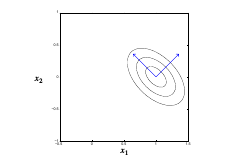

Figure.10 Contour Plot for $ E_D $


### Contour Plot for $ E_D $

$$
\begin{pmatrix} x_1 & x_2 \end{pmatrix}
$$

### Regularized Performance Index

The Hessian matrix for the regularized performance index (Eq. 13.34) is:

$$
\nabla^2 F^*(x) = \nabla^2 E_D + \rho \nabla^2 E_W = \nabla^2 E_D + 2\rho I = 2 \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} + 2\rho \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = 2 \begin{pmatrix} 1 + \rho & 1 \\ 1 & 1 + \rho \end{pmatrix}.
$$

In Figure.11, we show the contour plots for $ F $ with $ \rho $ equal to 0, 1, and $ \infty $.

### Contour Plot for $ F $

$$
\begin{pmatrix} x_1 & x_2 \end{pmatrix}
$$

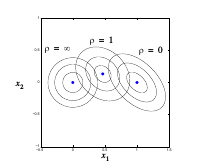

Figure.11 Contour Plot for F

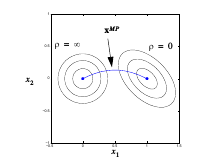
Figure.12 $x^ MP$ as $p$ is Varied

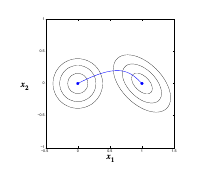

Figure.13 Steepest Descent Trajectory

## Contour Plot for $ F $

Figure.11 shows the contour plots for $ F $ with varying values of $ \rho $. Specifically:

- $ \rho = 0 $,
- $ \rho = 1 $,
- $ \rho = \infty $.

### Contour Plot for $ F $

$$
\begin{pmatrix} x_1 & x_2 \end{pmatrix}
$$

$$
\text{1} \quad \rho = 1 \\
\text{0.5} \quad \rho = \infty \\
\text{0} \quad \rho = 0 \\
$$

---

### Movement of $ x_{MP} $ as $ \rho $ is Varied

In Figure.12, the blue curve represents the movement of $ x_{MP} $ as $ \rho $ is varied:

$$
\begin{pmatrix} x_1 & x_2 \end{pmatrix}
$$

$$
1 \quad x_{MP} \\
0.5 \quad \rho = \infty \\
0 \quad \rho = 0 \\
$$

---

### Steepest Descent Trajectory and Early Stopping

Figure 13.13 shows the steepest descent trajectory for minimizing $ E_D $, starting from very small values for the weights. The early stopping result will fall along the blue curve. This curve is very close to the regularization curve in Figure.12.

If the number of iterations is very small, it is equivalent to a large value of $ \rho $. As the number of iterations increases, it is equivalent to reducing $ \rho $.

$$
\begin{pmatrix} x_1 & x_2 \end{pmatrix}
$$

---

### Eigenvalue Relationship and the Results of Early Stopping and Regularization

The relationship between the eigenvalues and eigenvectors of the Hessian matrix $ \nabla^2 E_D(x) $ and the results of regularization and early stopping can be analyzed as follows:

In this example, $ \lambda_2 $ is larger than $ \lambda_1 $, so $ E_D $ has higher curvature in the $ v_2 $ direction. This means that we will get a quicker reduction in the squared error if we move in that direction first, as shown in Figure.13. The initial steepest descent movement is almost in the $ v_2 $ direction.

In regularization (Figure 13.12), as $ \rho $ decreases from a large value, the weights move first in the $ v_2 $ direction. For a given change in the weights, this direction provides the largest reduction in the squared error.

Since $ \lambda_1 $ is smaller than $ \lambda_2 $, we move in the $ v_1 $ direction only after achieving significant reduction in $ E_D $ in the $ v_2 $ direction. This effect would be more pronounced if the difference between $ \lambda_1 $ and $ \lambda_2 $ were greater. 

In the limiting case where $ \lambda_1 = 0 $, there would be no need to move in the $ v_1 $ direction at all. Moving only in the $ v_2 $ direction would provide complete reduction in the squared error. (This corresponds to the stationary valley case, as in Figure .9.) 

---

### Effective Number of Parameters

In this case, we would effectively be using only one parameter, even though the network has two weights. The effective number of parameters is related to the number of eigenvalues of $ \nabla^2 E_D(x) $ that are significantly different from zero.

We will analyze this relationship in more detail in the next section.


In [1]:
# Initialize constants
A = [[2, 1], [1, 2]]  # Hessian matrix
d = [0, 0]            # Linear term vector
c = 0                 # Constant term
alpha = 0.1           # Learning rate for steepest descent

# Function to calculate the quadratic form E_D(x1, x2)
def compute_E_D(x1, x2):
    E = c + (d[0] * x1 + d[1] * x2) + 0.5 * (A[0][0] * x1**2 + A[1][1] * x2**2 + 2 * A[0][1] * x1 * x2)
    return E

# Function to compute gradient of E_D(x)
def gradient(x1, x2):
    grad_x1 = A[0][0] * x1 + A[0][1] * x2
    grad_x2 = A[1][0] * x1 + A[1][1] * x2
    return grad_x1, grad_x2

# Function to perform steepest descent
def steepest_descent(x1_init, x2_init, steps):
    x1, x2 = x1_init, x2_init
    trajectory = [(x1, x2)]
    for _ in range(steps):
        grad_x1, grad_x2 = gradient(x1, x2)
        x1 -= alpha * grad_x1
        x2 -= alpha * grad_x2
        trajectory.append((x1, x2))
    return trajectory

# Define grid range for x1 and x2
x1_values = [-1.5 + i * 0.1 for i in range(31)]
x2_values = [-1.5 + i * 0.1 for i in range(31)]

# Compute contour values
contours = []
for x1 in x1_values:
    row = []
    for x2 in x2_values:
        row.append(compute_E_D(x1, x2))
    contours.append(row)

# Print contour values (this is the equivalent of plotting without libraries)
print("Contour values:")
for row in contours:
    print(row)

# Steepest descent trajectory starting from (1, 1)
trajectory = steepest_descent(1, 1, 20)

# Print the trajectory points (this is the equivalent of plotting the steepest descent curve)
print("\nSteepest Descent Trajectory:")
for point in trajectory:
    print(f"x1 = {point[0]:.2f}, x2 = {point[1]:.2f}")


Contour values:
[6.75, 6.31, 5.890000000000001, 5.49, 5.11, 4.75, 4.409999999999999, 4.09, 3.7899999999999996, 3.51, 3.25, 3.01, 2.7899999999999996, 2.59, 2.4099999999999997, 2.25, 2.1100000000000003, 1.9899999999999998, 1.8899999999999997, 1.81, 1.75, 1.7100000000000002, 1.69, 1.6900000000000002, 1.71, 1.75, 1.8099999999999998, 1.8900000000000001, 1.99, 2.1100000000000003, 2.25]
[6.31, 5.879999999999999, 5.47, 5.079999999999999, 4.71, 4.359999999999999, 4.029999999999999, 3.7199999999999998, 3.4299999999999997, 3.1599999999999997, 2.91, 2.6799999999999997, 2.4699999999999998, 2.28, 2.1099999999999994, 1.9599999999999997, 1.8299999999999996, 1.7199999999999995, 1.63, 1.5599999999999996, 1.51, 1.4799999999999998, 1.47, 1.4799999999999998, 1.51, 1.56, 1.63, 1.7200000000000002, 1.83, 1.9600000000000004, 2.1100000000000003]
[5.890000000000001, 5.47, 5.07, 4.6899999999999995, 4.33, 3.99, 3.67, 3.37, 3.09, 2.83, 2.5900000000000003, 2.37, 2.17, 1.9900000000000002, 1.83, 1.6900000000000002, 1.

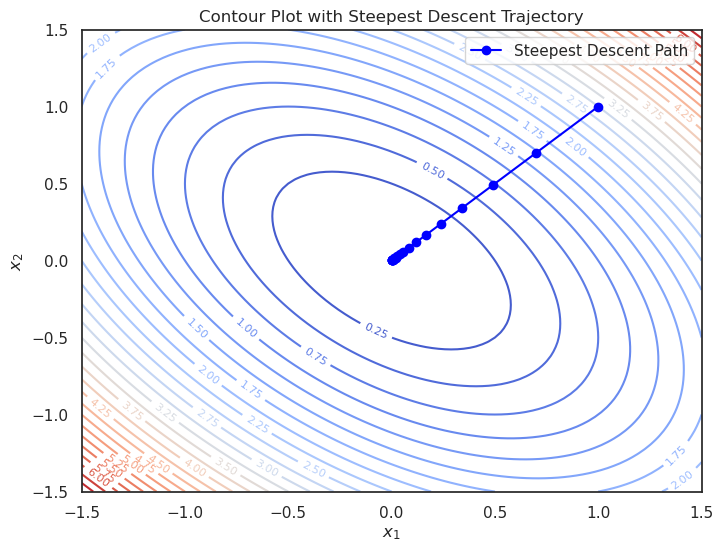

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize constants
A = np.array([[2, 1], [1, 2]])  # Hessian matrix
d = np.array([0, 0])            # Linear term vector
c = 0                           # Constant term
alpha = 0.1                     # Learning rate for steepest descent

# Function to calculate the quadratic form E_D(x1, x2)
def compute_E_D(x1, x2):
    x = np.array([x1, x2])
    E = c + np.dot(d, x) + 0.5 * np.dot(x.T, np.dot(A, x))
    return E

# Function to compute gradient of E_D(x)
def gradient(x1, x2):
    grad = np.dot(A, np.array([x1, x2]))
    return grad

# Function to perform steepest descent
def steepest_descent(x1_init, x2_init, steps):
    x1, x2 = x1_init, x2_init
    trajectory = [(x1, x2)]
    for _ in range(steps):
        grad = gradient(x1, x2)
        x1 -= alpha * grad[0]
        x2 -= alpha * grad[1]
        trajectory.append((x1, x2))
    return trajectory

# Define grid range for x1 and x2
x1_values = np.linspace(-1.5, 1.5, 100)
x2_values = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

# Compute contour values
E_D_values = np.array([[compute_E_D(x1, x2) for x2 in x2_values] for x1 in x1_values])

# Steepest descent trajectory starting from (1, 1)
trajectory = steepest_descent(1, 1, 20)
x1_traj = [point[0] for point in trajectory]
x2_traj = [point[1] for point in trajectory]

# Plot the contour plot using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.set(style='white')

# Contour plot
contour = plt.contour(X1, X2, E_D_values, levels=30, cmap="coolwarm")
plt.clabel(contour, inline=True, fontsize=8)

# Plot the steepest descent trajectory
plt.plot(x1_traj, x2_traj, marker='o', color='blue', label='Steepest Descent Path')

# Labels and Title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Contour Plot with Steepest Descent Trajectory')

# Add legend
plt.legend()

# Show plot
plt.show()


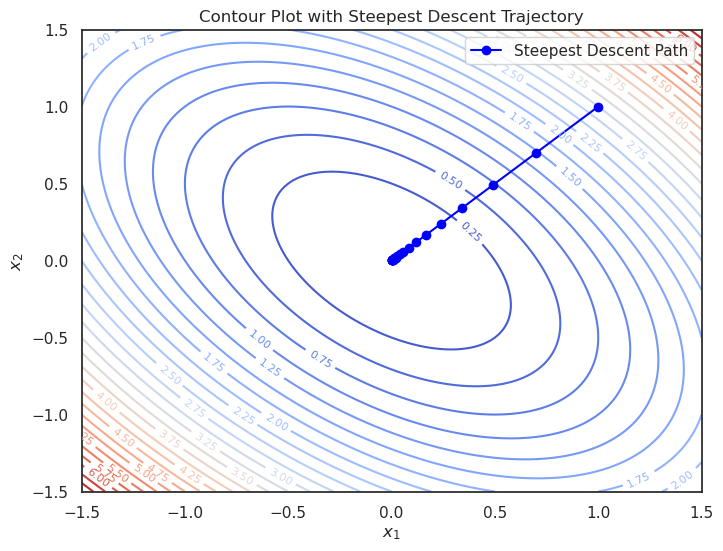

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize constants
A = [[2, 1], [1, 2]]  # Hessian matrix as a list of lists
d = [0, 0]            # Linear term vector
c = 0                 # Constant term
alpha = 0.1           # Learning rate for steepest descent

# Function to calculate dot product of two vectors
def dot_product(vec1, vec2):
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

# Function to multiply a matrix by a vector
def matrix_vector_mult(matrix, vector):
    return [dot_product(row, vector) for row in matrix]

# Function to calculate quadratic form E_D(x1, x2)
def compute_E_D(x1, x2):
    x = [x1, x2]
    quadratic_term = 0.5 * dot_product(x, matrix_vector_mult(A, x))
    linear_term = dot_product(d, x)
    return c + linear_term + quadratic_term

# Function to compute gradient of E_D(x)
def gradient(x1, x2):
    return matrix_vector_mult(A, [x1, x2])

# Function to perform steepest descent
def steepest_descent(x1_init, x2_init, steps):
    x1, x2 = x1_init, x2_init
    trajectory = [(x1, x2)]
    for _ in range(steps):
        grad = gradient(x1, x2)
        x1 -= alpha * grad[0]
        x2 -= alpha * grad[1]
        trajectory.append((x1, x2))
    return trajectory

# Define grid range for x1 and x2
x1_values = [x / 50.0 for x in range(-75, 76)]  # Generate values from -1.5 to 1.5
x2_values = [x / 50.0 for x in range(-75, 76)]  # Same for x2

# Compute contour values
E_D_values = [[compute_E_D(x1, x2) for x2 in x2_values] for x1 in x1_values]

# Steepest descent trajectory starting from (1, 1)
trajectory = steepest_descent(1, 1, 20)
x1_traj = [point[0] for point in trajectory]
x2_traj = [point[1] for point in trajectory]

# Plot the contour plot using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.set(style='white')

# Contour plot
contour = plt.contour(x1_values, x2_values, E_D_values, levels=30, cmap="coolwarm")
plt.clabel(contour, inline=True, fontsize=8)

# Plot the steepest descent trajectory
plt.plot(x1_traj, x2_traj, marker='o', color='blue', label='Steepest Descent Path')

# Labels and Title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Contour Plot with Steepest Descent Trajectory')

# Add legend
plt.legend()

# Show plot
plt.show()

## Effective Number of Parameters

Recall the previous definition for the effective number of parameters:

$$
\gamma = n - 2 \alpha \, \text{tr} \left\{ ( H^{MP} )^{-1} \right\}
\quad \text{(13.51)}
$$

We can express this in terms of the eigenvalues of $ \nabla^2 E_D(x) $. First, we can write the Hessian matrix as:

$$
H(x) = \nabla^2 F(x) = \beta \nabla^2 E_D + 2 \alpha I 
\quad \text{(13.52)}
$$

Using arguments similar to those leading to Eq. (13.44), we can show that the eigenvalues of $ H(x) $ are $ (\beta \lambda_i + 2\alpha) $.

We can then use two properties of the eigenvalues to compute $ \text{tr} \left\{ H^{-1} \right\} $. First, the eigenvalues of $ H^{-1} $ are the reciprocals of the eigenvalues of $ H $, and second, the trace of a matrix is equal to the sum of its eigenvalues. Using these two properties, we can write:

$$
\text{tr} \left\{ H^{-1} \right\} = \sum_{i=1}^{n} \frac{1}{\beta \lambda_i + 2 \alpha}
\quad \text{(13.53)}
$$

We can now write the effective number of parameters as:

$$
\gamma = n - 2 \alpha \, \text{tr} \left\{ ( H^{MP} )^{-1} \right\}
= n - \sum_{i=1}^{n} \frac{2 \alpha}{\beta \lambda_i + 2 \alpha}
= \sum_{i=1}^{n} \frac{\beta \lambda_i}{\beta \lambda_i + 2 \alpha}
\quad \text{(13.54)}
$$

or equivalently:

$$
\gamma = \sum_{i=1}^{n} \gamma_i
\quad \text{(13.55)}
$$

where:

$$
\gamma_i = \frac{\beta \lambda_i}{\beta \lambda_i + 2 \alpha}
\quad \text{(13.56)}
$$

Note that $ 0 \leq \gamma_i \leq 1 $, so the effective number of parameters $ \gamma $ must fall between zero and $ n $.

If all the eigenvalues of $ \nabla^2 E_D(x) $ are large, then the effective number of parameters will equal the total number of parameters $ n $. If some of the eigenvalues are very small, then the effective number of parameters will equal the number of large eigenvalues, as was demonstrated in the previous section.

Large eigenvalues mean large curvature, which indicates that the performance index changes rapidly along those eigenvectors. Every large eigenvector represents a productive direction for optimizing performance.


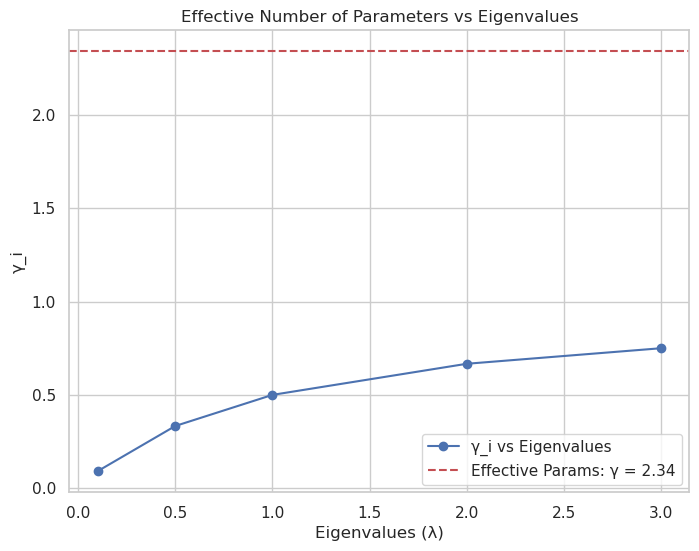

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set parameters
beta = 1  # Regularization multiplier
alpha = 0.5  # Regularization strength
n = 5  # Number of parameters (dimensionality)

# Sample eigenvalues (manually defined for this example)
eigenvalues = [3, 2, 1, 0.5, 0.1]

# Compute gamma_i for each eigenvalue using the equation γ_i = (β * λ_i) / (β * λ_i + 2α)
gamma_i = [(beta * lambd) / (beta * lambd + 2 * alpha) for lambd in eigenvalues]

# Compute the effective number of parameters (γ = sum of all γ_i)
gamma = sum(gamma_i)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(eigenvalues, gamma_i, 'bo-', label='γ_i vs Eigenvalues')
plt.axhline(y=gamma, color='r', linestyle='--', label=f'Effective Params: γ = {gamma:.2f}')
plt.title('Effective Number of Parameters vs Eigenvalues')
plt.xlabel('Eigenvalues (λ)')
plt.ylabel('γ_i')
plt.legend()
plt.show()


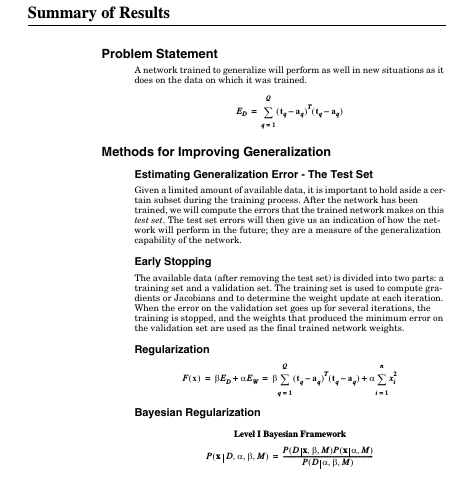

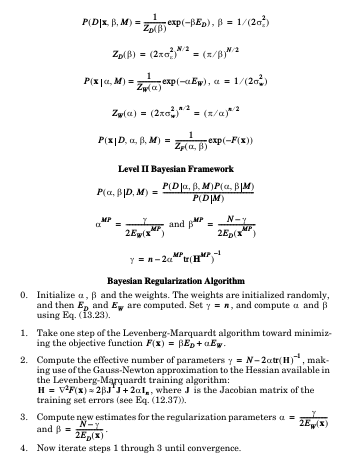

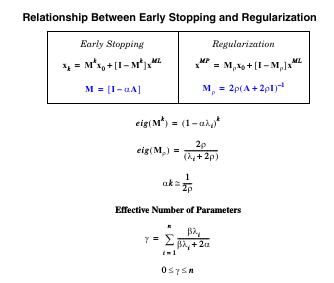